In [16]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
import quandl as ql
import hvplot.pandas
import plotly.express as px
%matplotlib inline

In [17]:
#Getting CFTC data from Quandl
ql.ApiConfig.api_key = 'tJdgrzhuFvMvkw--DdYw'
GOLD_data = ql.get('CFTC/088691_FO_L_ALL')
GOLD_data.tail()

,Open Interest,Noncommercial Long,Noncommercial Short,Noncommercial Spreads,Commercial Long,Commercial Short,Total Long,Total Short,Nonreportable Positions Long,Nonreportable Positions Short
Date,,,,,,,,,,
2020-06-16,910794.0,299684.0,57187.0,274038.0,275372.0,553171.0,849094.0,884396.0,61700.0,26398.0
2020-06-23,1004682.0,335264.0,59738.0,308051.0,292136.0,604248.0,935451.0,972036.0,69230.0,32645.0
2020-06-30,990185.0,355678.0,65306.0,291233.0,273880.0,600793.0,920791.0,957333.0,69394.0,32852.0
2020-07-07,1008422.0,366449.0,73204.0,293320.0,278128.0,608270.0,937897.0,974793.0,70524.0,33628.0
2020-07-14,1016765.0,358149.0,69220.0,300720.0,286264.0,616390.0,945133.0,986330.0,71632.0,30436.0


In [18]:
#Clean Data
GOLD_data = GOLD_data.drop(columns=["Open Interest", 
                                  "Noncommercial Spreads", 
                                  "Commercial Long", 
                                  "Commercial Short", 
                                  "Total Long",
                                  "Total Short",
                                  "Nonreportable Positions Long", 
                                  "Nonreportable Positions Short"])
GOLD_data.head()

,Noncommercial Long,Noncommercial Short
Date,,
1995-03-21,17167.0,11285.0
1995-03-28,14551.0,11466.0
1995-04-04,47565.0,4359.0
1995-04-18,53491.0,4571.0
1995-04-25,46462.0,4135.0


In [7]:
#Calculate Net Data
GOLD_data["Net Noncommercial Futures/Options"] = GOLD_data["Noncommercial Long"] - GOLD_data["Noncommercial Short"]
GOLD_data.tail()

,Noncommercial Long,Noncommercial Short,Net Noncommercial Futures/Options
Date,,,
2020-06-16,299684.0,57187.0,242497.0
2020-06-23,335264.0,59738.0,275526.0
2020-06-30,355678.0,65306.0,290372.0
2020-07-07,366449.0,73204.0,293245.0
2020-07-14,358149.0,69220.0,288929.0


In [8]:
#Calculate mean and std
Average = GOLD_data["Net Noncommercial Futures/Options"].mean()
x = np.array(GOLD_data["Net Noncommercial Futures/Options"])
std = x.std()

z_score_historical = ((GOLD_data["Net Noncommercial Futures/Options"][-1]) - Average)/std
z_score_historical

1.8447534119807287

C:\Users\Joseph\anaconda3\envs\pyvizenv\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


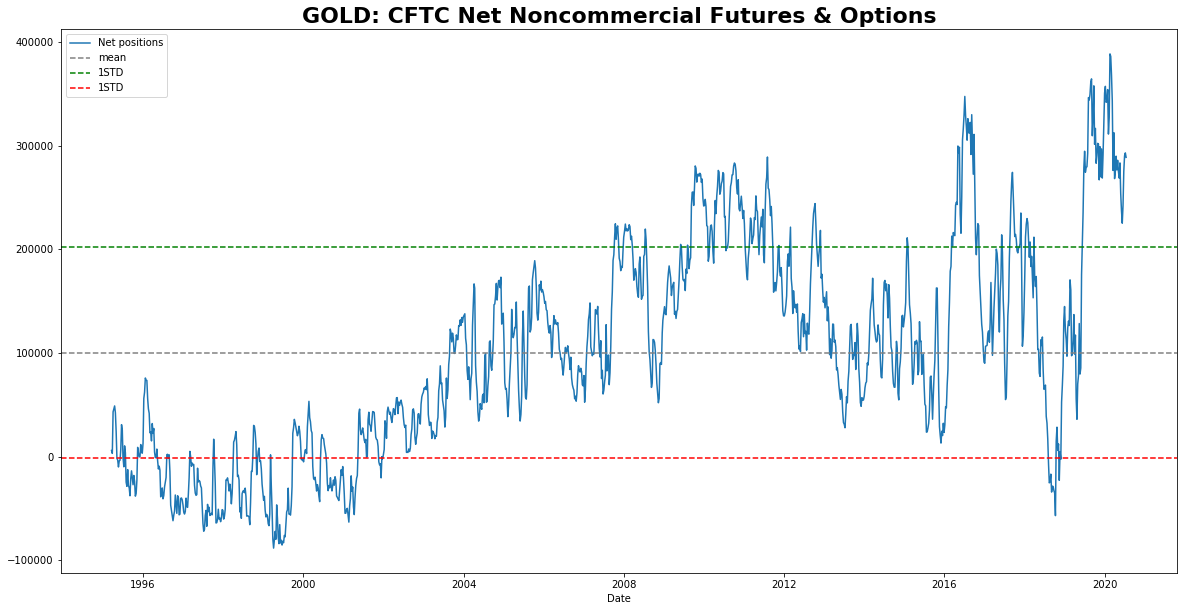

In [9]:
#Plot GOLD CFTC data
def create_plot(data):
    x = GOLD_data.index
    y = GOLD_data["Net Noncommercial Futures/Options"]
    std_positive = (Average + std)
    std_negative = (Average - std)

    plt.subplots(figsize=(20,10))
    plt.plot(x,y, label="Net positions")
    plt.axhline(y=Average,color="grey",linestyle="--", label="mean")
    plt.axhline(y=std_positive, color="green", linestyle="--",label="1STD")
    plt.axhline(y=std_negative, color="red", linestyle="--", label="1STD")
    plt.legend()
    plt.xlabel("Date")
    plt.title(f"GOLD: CFTC Net Noncommercial Futures & Options", fontdict={'fontweight':'bold', 'fontsize':'22'})
    plt.show()
create_plot(GOLD_data["Net Noncommercial Futures/Options"])

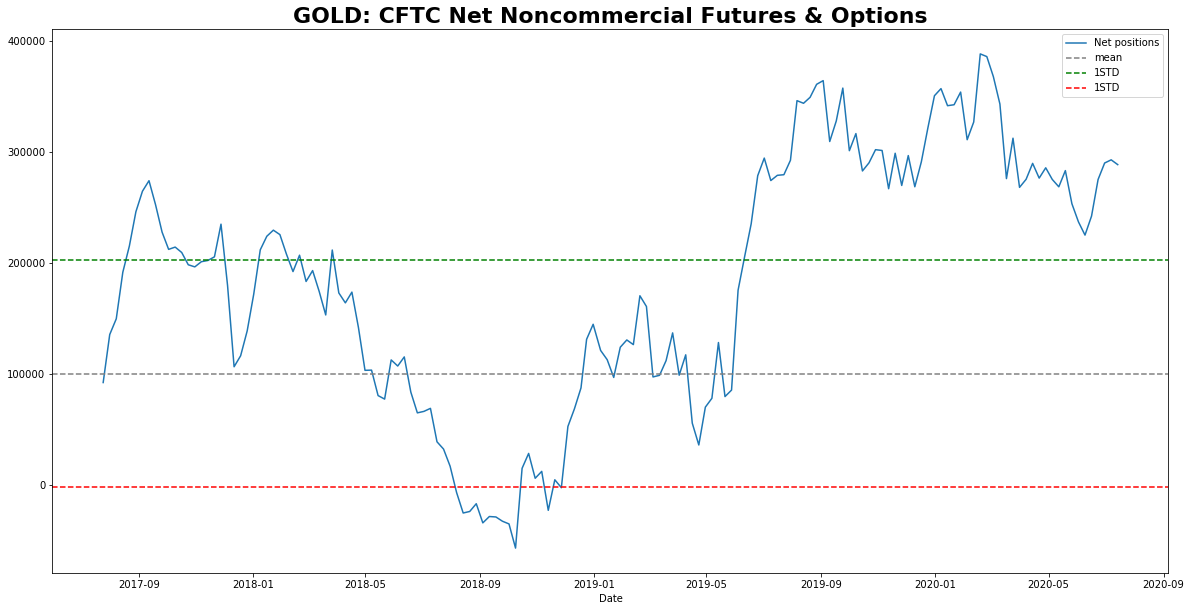

In [10]:
##Plot EUR CFTC data last 3 years
def create_plot(data):
    x = GOLD_data.index[-156:]
    y = GOLD_data["Net Noncommercial Futures/Options"][-156:]
    std_positive = (Average + std)
    std_negative = (Average - std)

    plt.subplots(figsize=(20,10))
    plt.plot(x,y, label="Net positions")
    plt.axhline(y=Average,color="grey",linestyle="--", label="mean")
    plt.axhline(y=std_positive, color="green", linestyle="--",label="1STD")
    plt.axhline(y=std_negative, color="red", linestyle="--", label="1STD")
    plt.legend()
    plt.xlabel("Date")
    plt.title(f"GOLD: CFTC Net Noncommercial Futures & Options", fontdict={'fontweight':'bold', 'fontsize':'22'})
    plt.show()
create_plot(GOLD_data["Net Noncommercial Futures/Options"][-156:])


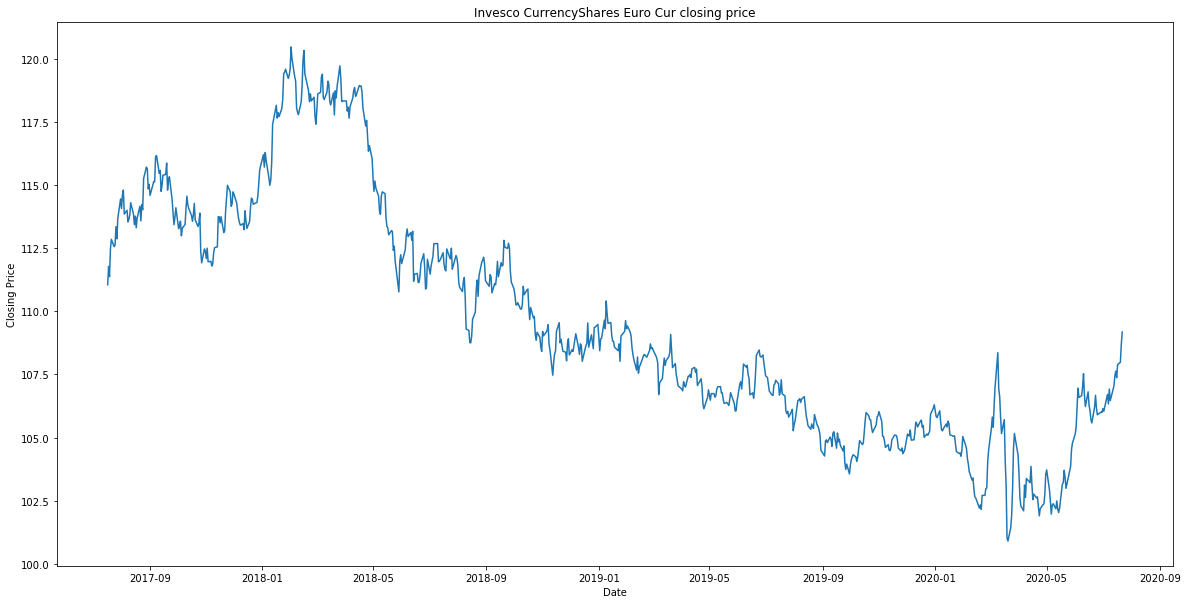

In [11]:
# Plotting Price action
def create_plot(tickersymbol):
    ticker_data = yf.Ticker(tickersymbol)
    today = datetime.datetime.today().isoformat()
    
    ticker_df = ticker_data.history(period='1d', start='2017-07-15', end=today[:10])
    plt.subplots(figsize=(20,10))
    plt.plot(ticker_df["Close"], label=ticker_data.info['shortName'])
    plt.xlabel("Date")
    plt.ylabel("Closing Price")
    plt.title(f"{ticker_data.info['shortName']} closing price")
    
create_plot('FXE')

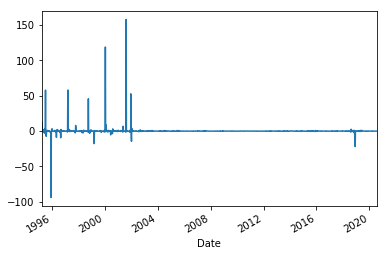

In [12]:
# Calculating changes in CFTC data
GOLD_data_changes = GOLD_data.pct_change()
GOLD_data_changes = GOLD_data_changes.dropna()
GOLD_data_changes["Net Noncommercial Futures/Options"].plot()

In [13]:
def zscore(x, window):
    r = x.rolling(window=window)
    m = r.mean().shift(1)
    s = r.std(ddof=0).shift(1)
    z = (x-m)/s
    return z


In [15]:
data = ql.get('CFTC/088691_FO_L_ALL')
data_cleaned = data[['Noncommercial Long', 'Noncommercial Short']]
data_cleaned['Net Noncomercial'] = data_cleaned['Noncommercial Long'] - data_cleaned['Noncommercial Short']
data_cleaned['Zscore'] = zscore(data_cleaned.loc[:,'Net Noncomercial'], 52*3)
data_cleaned.tail()


C:\Users\Joseph\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Joseph\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Noncommercial Long,Noncommercial Short,Net Noncomercial,Zscore
Date,,,,
2020-06-16,299684.0,57187.0,242497.0,0.552596
2020-06-23,335264.0,59738.0,275526.0,0.837809
2020-06-30,355678.0,65306.0,290372.0,0.958842
2020-07-07,366449.0,73204.0,293245.0,0.972015
2020-07-14,358149.0,69220.0,288929.0,0.921702
